# Exploración inicial dataset S10

Esta exploración inicial será sobre el dataset principal que engloba todos los partidos competitivos de las ligas domesticas durante la temporada 10 de League of legends

## 1. Preparación Previa

### 1.1 Importe de librerias

In [1]:
import pandas as pd
import numpy as np

import scipy as sp

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
sys.path.append('C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src')
import Utils

### 1.2 Carga de datos

In [2]:
S10_dataset = pd.read_csv("C:\\Users\\camil\\Downloads\\The Bridge\\08_19_2020.csv", sep =";")

## 2. Exploración inicial

In [3]:
S10_dataset.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
0,1241318,KeSPA,NaN,0,03/01/2020 7:33,1,9.24,2220,SANDBOX Gaming,LeBlanc,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
1,1241322,KeSPA,NaN,0,03/01/2020 9:00,2,9.24,2227,T1,Syndra,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2,1241324,KeSPA,NaN,0,03/01/2020 10:05,3,9.24,1711,T1,LeBlanc,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
3,1241328,KeSPA,NaN,0,03/01/2020 10:57,4,9.24,1999,T1,Rumble,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
4,1241386,KeSPA,NaN,0,04/01/2020 5:33,1,9.24,1812,DRX,Qiyana,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0


In [4]:
S10_dataset.tail()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
5144,1310259,EM,NaN,0,18/08/2020 20:25,1,10.16,2075,Racoon,Caitlyn,...,12.0,8.0,4.0,6.9976,3613.0,4564.0,83.0,5159.0,6917.0,127.0
5145,1310260,EM,NaN,0,18/08/2020 20:27,1,10.16,2095,SINNERS Esports,Shen,...,8.0,0.0,4.0,4.4105,2509.0,3346.0,49.0,4212.0,4791.0,72.0
5146,1310262,EM,NaN,0,18/08/2020 20:53,1,10.16,2879,Team GamerLegion,Nidalee,...,10.0,10.0,0.0,7.0441,2995.0,4173.0,54.0,4536.0,6535.0,93.0
5147,1320317,EM,NaN,0,18/08/2020 20:56,1,10.16,1874,G2 Arctic,Cho'Gath,...,1.0,1.0,0.0,6.1473,3177.0,4291.0,57.0,5139.0,7260.0,109.0
5148,1310264,EM,NaN,0,18/08/2020 21:27,1,10.16,1808,Intrepid Fox Gaming,Akali,...,0.0,0.0,0.0,7.6991,3027.0,4252.0,74.0,4764.0,7047.0,124.0


In [5]:
S10_dataset.dtypes

gameId            object
league            object
split             object
playoffs           int64
date              object
                  ...   
t2p5pat10        float64
t2p5_csat10      float64
t2p5_goldat15    float64
t2p5pat15        float64
t2p5_csat15      float64
Length: 408, dtype: object

In [6]:
S10_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        5148 non-null   object 
 1    league                        5149 non-null   object 
 2    split                         3566 non-null   object 
 3    playoffs                      5149 non-null   int64  
 4    date                          5149 non-null   object 
 5    game                          5149 non-null   int64  
 6    patch                         5149 non-null   float64
 7    gamelength                    5149 non-null   int64  
 8    t1_playerid                   5149 non-null   object 
 9    t1_ban1                       4839 non-null   object 
 10   t1_ban2                       4843 non-null   object 
 11   t1_ban3                       5116 non-null   object 
 12   t1_ban4                       4833 non-null   

In [7]:
S10_dataset.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5148.000000,5095.000000,5149.000000,5067.000000,5067.000000,...,5148.000000,5148.000000,5148.000000,5149.000000,5095.000000,5095.000000,5095.000000,5091.000000,5091.000000,5091.000000
mean,0.088367,1.511556,10.091468,1954.632356,0.529229,0.505633,0.465751,2.445912,2.322873,0.585159,...,14.986791,8.168803,1.971057,7.610857,3224.673405,4495.384102,74.880275,5137.865449,7101.329012,120.271459
std,0.283855,0.786265,0.058239,346.563783,0.499193,0.500017,0.498875,1.475926,1.368083,0.798242,...,12.818328,8.323369,3.725231,1.163776,358.527040,396.128964,11.336944,644.707323,625.069560,16.407440
min,0.000000,1.000000,9.240000,1005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867100,1919.000000,2021.000000,12.000000,2841.000000,3346.000000,19.000000
25%,0.000000,1.000000,10.060000,1711.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,5.000000,1.000000,0.000000,6.844600,2995.000000,4273.000000,68.000000,4697.000000,6713.500000,110.000000
50%,0.000000,1.000000,10.110000,1913.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,...,12.000000,6.000000,0.000000,7.603800,3190.000000,4540.000000,76.000000,5049.000000,7145.000000,121.000000
75%,0.000000,2.000000,10.130000,2158.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,22.000000,12.000000,3.000000,8.368600,3417.500000,4773.500000,83.000000,5492.000000,7529.000000,131.000000
max,1.000000,5.000000,10.160000,3751.000000,1.000000,1.000000,1.000000,10.000000,4.000000,4.000000,...,136.000000,106.000000,36.000000,11.822200,5296.000000,5756.000000,107.000000,9006.000000,9479.000000,171.000000


In [8]:
S10_dataset.shape

(5149, 408)

In [9]:
# Cardinalidad
for i in S10_dataset.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(S10_dataset[i].nunique()/S10_dataset.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 99.98%
La cardinalidad de la variable league es 0.45%
La cardinalidad de la variable split es 0.14%
La cardinalidad de la variable date es 97.63%
La cardinalidad de la variable t1_playerid es 4.74%
La cardinalidad de la variable t1_ban1 es 2.08%
La cardinalidad de la variable t1_ban2 es 2.12%
La cardinalidad de la variable t1_ban3 es 2.16%
La cardinalidad de la variable t1_ban4 es 2.49%
La cardinalidad de la variable t1_ban5 es 2.41%
La cardinalidad de la variable t2_playerid es 4.74%
La cardinalidad de la variable t2_ban1 es 1.96%
La cardinalidad de la variable t2_ban2 es 2.04%
La cardinalidad de la variable t2_ban3 es 2.06%
La cardinalidad de la variable t2_ban4 es 2.62%
La cardinalidad de la variable t2_ban5 es 2.43%
La cardinalidad de la variable t1p1_position es 0.02%
La cardinalidad de la variable t1p1_player es 6.62%
La cardinalidad de la variable t1p1_team es 4.74%
La cardinalidad de la variable t1p1_champion es 0.99%
La cardinalidad de 

## 3. Limpieza inicial

### 3.1 Fechas

Lo primero que vamos a a hacer es pasar los datos de la columna *date* a tipo ```datetime```.

In [10]:
S10_dataset["date"].dtypes

dtype('O')

Verificamos que no haya ninguna fecha nula.

In [11]:
S10_dataset["date"][S10_dataset["date"].isnull()].count()

0

Comprobamos el formato de la fecha.

In [12]:
S10_dataset["date"]

0        03/01/2020 7:33
1        03/01/2020 9:00
2       03/01/2020 10:05
3       03/01/2020 10:57
4        04/01/2020 5:33
              ...       
5144    18/08/2020 20:25
5145    18/08/2020 20:27
5146    18/08/2020 20:53
5147    18/08/2020 20:56
5148    18/08/2020 21:27
Name: date, Length: 5149, dtype: object

Procedemos a hacer la conversión a formato datetime, viendo que la columna está limpia y habiendo verificado el formato de la fecha, procedemos a pasar los tipos de la columna date a tipo datetime.

In [13]:
S10_dataset["date"] = pd.to_datetime(S10_dataset["date"], dayfirst= True, format="mixed")

In [14]:
S10_dataset.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
0,1241318,KeSPA,NaN,0,2020-01-03 07:33:00,1,9.24,2220,SANDBOX Gaming,LeBlanc,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
1,1241322,KeSPA,NaN,0,2020-01-03 09:00:00,2,9.24,2227,T1,Syndra,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2,1241324,KeSPA,NaN,0,2020-01-03 10:05:00,3,9.24,1711,T1,LeBlanc,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
3,1241328,KeSPA,NaN,0,2020-01-03 10:57:00,4,9.24,1999,T1,Rumble,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
4,1241386,KeSPA,NaN,0,2020-01-04 05:33:00,1,9.24,1812,DRX,Qiyana,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0


In [15]:
S10_dataset["date"].dtypes

dtype('<M8[ns]')

Para que quede ordenado por fecha, hacemos la fecha el indice.

In [16]:
S10_dataset.set_index("date")

,gameId,league,split,playoffs,game,patch,gamelength,t1_playerid,t1_ban1,t1_ban2,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03 07:33:00,1241318,KeSPA,NaN,0,1,9.24,2220,SANDBOX Gaming,LeBlanc,Irelia,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
2020-01-03 09:00:00,1241322,KeSPA,NaN,0,2,9.24,2227,T1,Syndra,LeBlanc,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2020-01-03 10:05:00,1241324,KeSPA,NaN,0,3,9.24,1711,T1,LeBlanc,Rumble,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
2020-01-03 10:57:00,1241328,KeSPA,NaN,0,4,9.24,1999,T1,Rumble,Varus,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
2020-01-04 05:33:00,1241386,KeSPA,NaN,0,1,9.24,1812,DRX,Qiyana,Orianna,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-18 20:25:00,1310259,EM,NaN,0,1,10.16,2075,Racoon,Caitlyn,Karma,...,12.0,8.0,4.0,6.9976,3613.0,4564.0,83.0,5159.0,6917.0,127.0
2020-08-18 20:27:00,1310260,EM,NaN,0,1,10.16,2095,SINNERS Esports,Shen,Senna,...,8.0,0.0,4.0,4.4105,2509.0,3346.0,49.0,4212.0,4791.0,72.0
2020-08-18 20:53:00,1310262,EM,NaN,0,1,10.16,2879,Team GamerLegion,Nidalee,Twisted Fate,...,10.0,10.0,0.0,7.0441,2995.0,4173.0,54.0,4536.0,6535.0,93.0


Con la fecha ya modificadas procedemos a guardar el DataFrame en un archivo csv.

In [17]:
S10_dataset.to_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv", index=False)

### 3.2 Valores nulos

De momento no vamos a tratar los valores nulos. Esto se debe a que como el estudio lo vamos a enfocar principalmente en las ligas mayotiras haremos ese tramiento por específico en cada liga para poder imputar los datos de una manera más exacta.

### 3.3 Columnas

Este apartado está dedicado a la nomeclatura y verificación de validez de las columnas, para ello, lo primero que vamos a hacer es cargar los datos desde el csv actulizado.

In [18]:
df_col = pd.read_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv", index_col=False, parse_dates=["date"])

Para empezar, vamos a explorar las columnas y añadirlas a una variable.

In [19]:
import Utils.col

In [20]:
Utils.col.mostrar_col(df_col)

gameId
league
split
playoffs
date
game
patch
gamelength
t1_playerid
t1_ban1
t1_ban2
t1_ban3
t1_ban4
t1_ban5
t1_result
t1_firstblood
t1_firstdragon
t1_dragons
t1_elementaldrakes
t1_infernals
t1_mountains
t1_clouds
t1_oceans
t1_elders
t1_firstherald
t1_heralds
t1_firstbaron
t1_barons
t1_firsttower
t1_towers
t1_firstmidtower
t1_firsttothreetowers
t1_inhibitors
t2_playerid
t2_ban1
t2_ban2
t2_ban3
t2_ban4
t2_ban5
t2_result
t2_firstblood
t2_firstdragon
t2_dragons
t2_elementaldrakes
t2_infernals
t2_mountains
t2_clouds
t2_oceans
t2_elders
t2_firstherald
t2_heralds
t2_firstbaron
t2_barons
t2_firsttower
t2_towers
t2_firstmidtower
t2_firsttothreetowers
t2_inhibitors
t1p1_position
t1p1_player
t1p1_team
t1p1_champion
t1p1_kills
t1p1_deaths
t1p1_assists
t1p1_firstblood
t1p1_firstbloodkill
t1p1_firstbloodassist
t1p1_firstbloodvictim
t1p1_damagetochampions
t1p1_dpm
t1p1_wardsplaced
t1p1_wpm
t1p1_wardskilled
t1p1_wcpm
t1p1_controlwardsbought
t1p1_visionscore
t1p1_vspm
t1p1_totalgold
t1p1_earnedgold
t1p

El primer tratamiento que vamos a hacer en las columnas es el siguiente: para facilitar lectura y homogeneizar nomeclatura vamos a sustituir los nombres *t1* por *blue* y *t2* por *blue* ya que son los lados a los que corresponden.

In [21]:
# De t1_ a blue_

df_col.columns = df_col.columns.str.replace("t1_", "blue_")

En el caso del lado rojo es más complicado porque tenemos varios nombres con la expresion *at10* y *at15* por lo tanto si utilizamos el cambio de *t1* a *red* directamente se verían modificdos también.

In [22]:
# t1p1
df_col.columns = df_col.columns.str.replace("t1p1", "blue_p1")

# t1p2
df_col.columns = df_col.columns.str.replace("t1p2", "blue_p2")

#t1p3
df_col.columns = df_col.columns.str.replace("t1p3", "blue_p3")

#t1p4

df_col.columns = df_col.columns.str.replace("t1p4", "blue_p4")

#t1p4

df_col.columns = df_col.columns.str.replace("t1p5", "blue_p5")

In [23]:
# De t2 a red 

df_col.columns = df_col.columns.str.replace("t2_", "red_")

df_col.columns = df_col.columns.str.replace("t2", "red_")


In [24]:
Utils.col.mostrar_col(df_col)

gameId
league
split
playoffs
date
game
patch
gamelength
blue_playerid
blue_ban1
blue_ban2
blue_ban3
blue_ban4
blue_ban5
blue_result
blue_firstblood
blue_firstdragon
blue_dragons
blue_elementaldrakes
blue_infernals
blue_mountains
blue_clouds
blue_oceans
blue_elders
blue_firstherald
blue_heralds
blue_firstbaron
blue_barons
blue_firsttower
blue_towers
blue_firstmidtower
blue_firsttothreetowers
blue_inhibitors
red_playerid
red_ban1
red_ban2
red_ban3
red_ban4
red_ban5
red_result
red_firstblood
red_firstdragon
red_dragons
red_elementaldrakes
red_infernals
red_mountains
red_clouds
red_oceans
red_elders
red_firstherald
red_heralds
red_firstbaron
red_barons
red_firsttower
red_towers
red_firstmidtower
red_firsttothreetowers
red_inhibitors
blue_p1_position
blue_p1_player
blue_p1_team
blue_p1_champion
blue_p1_kills
blue_p1_deaths
blue_p1_assists
blue_p1_firstblood
blue_p1_firstbloodkill
blue_p1_firstbloodassist
blue_p1_firstbloodvictim
blue_p1_damagetochampions
blue_p1_dpm
blue_p1_wardsplaced
blue

Lo siguiente es renombra las colimnas *player_id* ya que equivalen a el nombre del equipo.

In [25]:
df_col[["blue_playerid", "red_playerid"]]

,blue_playerid,red_playerid
0,SANDBOX Gaming,T1
1,T1,SANDBOX Gaming
2,T1,SANDBOX Gaming
3,T1,SANDBOX Gaming
4,DRX,Afreeca Freecs
...,...,...
5144,Racoon,SAMCLAN Esports Club
5145,SINNERS Esports,Five Kings
5146,Team GamerLegion,Riddle Esports
5147,G2 Arctic,CR4ZY


In [26]:
df_col.columns = df_col.columns.str.replace("playerid", "team")

In [27]:
Utils.col.mostrar_col(df_col)

gameId
league
split
playoffs
date
game
patch
gamelength
blue_team
blue_ban1
blue_ban2
blue_ban3
blue_ban4
blue_ban5
blue_result
blue_firstblood
blue_firstdragon
blue_dragons
blue_elementaldrakes
blue_infernals
blue_mountains
blue_clouds
blue_oceans
blue_elders
blue_firstherald
blue_heralds
blue_firstbaron
blue_barons
blue_firsttower
blue_towers
blue_firstmidtower
blue_firsttothreetowers
blue_inhibitors
red_team
red_ban1
red_ban2
red_ban3
red_ban4
red_ban5
red_result
red_firstblood
red_firstdragon
red_dragons
red_elementaldrakes
red_infernals
red_mountains
red_clouds
red_oceans
red_elders
red_firstherald
red_heralds
red_firstbaron
red_barons
red_firsttower
red_towers
red_firstmidtower
red_firsttothreetowers
red_inhibitors
blue_p1_position
blue_p1_player
blue_p1_team
blue_p1_champion
blue_p1_kills
blue_p1_deaths
blue_p1_assists
blue_p1_firstblood
blue_p1_firstbloodkill
blue_p1_firstbloodassist
blue_p1_firstbloodvictim
blue_p1_damagetochampions
blue_p1_dpm
blue_p1_wardsplaced
blue_p1_wpm


En cuanto a la nomeclatura de las columnas, la última modificación que vamos a hacer es ver si *p1*,  *p2*,  *p3*,  *p4* y  *p5*  se correspoden con posiciones específicas dentro del juego.

In [28]:
df_col[["blue_p1_position", "red_p1_position"]].value_counts()

blue_p1_position  red_p1_position
sup               sup                5149
Name: count, dtype: int64

In [29]:
df_col[["blue_p2_position", "red_p2_position"]].value_counts()

blue_p2_position  red_p2_position
bot               bot                5149
Name: count, dtype: int64

In [30]:
df_col[["blue_p3_position", "red_p3_position"]].value_counts()

blue_p3_position  red_p3_position
mid               mid                5149
Name: count, dtype: int64

In [31]:
df_col[["blue_p4_position", "red_p4_position"]].value_counts()

blue_p4_position  red_p4_position
jng               jng                5149
Name: count, dtype: int64

In [32]:
df_col[["blue_p5_position", "red_p5_position"]].value_counts()

blue_p5_position  red_p5_position
top               top                5149
Name: count, dtype: int64

Habiendo corrobado que cada posición se corresponde con un rol en específico, procedemos a modificar el nombre de la columna para tener un DataFrame más verboso.

In [33]:
# p1 to sup
df_col.columns = df_col.columns.str.replace("p1", "sup")

#p2 to bot
df_col.columns = df_col.columns.str.replace("p2", "bot")

#p3 to mid
df_col.columns = df_col.columns.str.replace("p3", "mid")

#p4 to jng
df_col.columns = df_col.columns.str.replace("p4", "jng")

#p5 to top
df_col.columns = df_col.columns.str.replace("p5", "top")

Además con ello, podemos eliminar las columnas posición y así aligerar el DataFrame

In [34]:
for columna in df_col:
    if columna.endswith("position"):
        del df_col[f"{columna}"]

In [35]:
Utils.col.mostrar_col(df_col)

gameId
league
split
playoffs
date
game
patch
gamelength
blue_team
blue_ban1
blue_ban2
blue_ban3
blue_ban4
blue_ban5
blue_result
blue_firstblood
blue_firstdragon
blue_dragons
blue_elementaldrakes
blue_infernals
blue_mountains
blue_clouds
blue_oceans
blue_elders
blue_firstherald
blue_heralds
blue_firstbaron
blue_barons
blue_firsttower
blue_towers
blue_firstmidtower
blue_firsttothreetowers
blue_inhibitors
red_team
red_ban1
red_ban2
red_ban3
red_ban4
red_ban5
red_result
red_firstblood
red_firstdragon
red_dragons
red_elementaldrakes
red_infernals
red_mountains
red_clouds
red_oceans
red_elders
red_firstherald
red_heralds
red_firstbaron
red_barons
red_firsttower
red_towers
red_firstmidtower
red_firsttothreetowers
red_inhibitors
blue_sup_player
blue_sup_team
blue_sup_champion
blue_sup_kills
blue_sup_deaths
blue_sup_assists
blue_sup_firstblood
blue_sup_firstbloodkill
blue_sup_firstbloodassist
blue_sup_firstbloodvictim
blue_sup_damagetochampions
blue_sup_dpm
blue_sup_wardsplaced
blue_sup_wpm
blu

Tambien podemos eliminar las columnas que indican que equipo de los jugadores, pues es redundante, ya que tenemos dos columnas (*blue_team*, *red_team*) que nos indican que equipo juega en cada lado. 

In [36]:
df_col[["blue_team", "blue_top_team", "blue_mid_team", "blue_jng_team", "blue_bot_team", "blue_sup_team"]]

,blue_team,blue_top_team,blue_mid_team,blue_jng_team,blue_bot_team,blue_sup_team
0,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming
1,T1,T1,T1,T1,T1,T1
2,T1,T1,T1,T1,T1,T1
3,T1,T1,T1,T1,T1,T1
4,DRX,DRX,DRX,DRX,DRX,DRX
...,...,...,...,...,...,...
5144,Racoon,Racoon,Racoon,Racoon,Racoon,Racoon
5145,SINNERS Esports,SINNERS Esports,SINNERS Esports,SINNERS Esports,SINNERS Esports,SINNERS Esports
5146,Team GamerLegion,Team GamerLegion,Team GamerLegion,Team GamerLegion,Team GamerLegion,Team GamerLegion
5147,G2 Arctic,G2 Arctic,G2 Arctic,G2 Arctic,G2 Arctic,G2 Arctic


In [37]:
df_col[["red_team", "red_top_team", "red_mid_team", "red_jng_team", "red_bot_team", "red_sup_team"]]

,red_team,red_top_team,red_mid_team,red_jng_team,red_bot_team,red_sup_team
0,T1,T1,T1,T1,T1,T1
1,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming
2,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming
3,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming,SANDBOX Gaming
4,Afreeca Freecs,Afreeca Freecs,Afreeca Freecs,Afreeca Freecs,Afreeca Freecs,Afreeca Freecs
...,...,...,...,...,...,...
5144,SAMCLAN Esports Club,SAMCLAN Esports Club,SAMCLAN Esports Club,SAMCLAN Esports Club,SAMCLAN Esports Club,SAMCLAN Esports Club
5145,Five Kings,Five Kings,Five Kings,Five Kings,Five Kings,Five Kings
5146,Riddle Esports,Riddle Esports,Riddle Esports,Riddle Esports,Riddle Esports,Riddle Esports
5147,CR4ZY,CR4ZY,CR4ZY,CR4ZY,CR4ZY,CR4ZY


In [38]:
b_team = df_col[["blue_top_team", "blue_mid_team", "blue_jng_team", "blue_bot_team", "blue_sup_team"]]
r_team = df_col[["red_top_team", "red_mid_team", "red_jng_team", "red_bot_team", "red_sup_team"]]

for team_col in df_col:
    if team_col in b_team:
        del df_col[f"{team_col}"]
        
    elif team_col in r_team:
        del df_col[f"{team_col}"]

In [39]:
Utils.col.mostrar_col(df_col)

gameId
league
split
playoffs
date
game
patch
gamelength
blue_team
blue_ban1
blue_ban2
blue_ban3
blue_ban4
blue_ban5
blue_result
blue_firstblood
blue_firstdragon
blue_dragons
blue_elementaldrakes
blue_infernals
blue_mountains
blue_clouds
blue_oceans
blue_elders
blue_firstherald
blue_heralds
blue_firstbaron
blue_barons
blue_firsttower
blue_towers
blue_firstmidtower
blue_firsttothreetowers
blue_inhibitors
red_team
red_ban1
red_ban2
red_ban3
red_ban4
red_ban5
red_result
red_firstblood
red_firstdragon
red_dragons
red_elementaldrakes
red_infernals
red_mountains
red_clouds
red_oceans
red_elders
red_firstherald
red_heralds
red_firstbaron
red_barons
red_firsttower
red_towers
red_firstmidtower
red_firsttothreetowers
red_inhibitors
blue_sup_player
blue_sup_champion
blue_sup_kills
blue_sup_deaths
blue_sup_assists
blue_sup_firstblood
blue_sup_firstbloodkill
blue_sup_firstbloodassist
blue_sup_firstbloodvictim
blue_sup_damagetochampions
blue_sup_dpm
blue_sup_wardsplaced
blue_sup_wpm
blue_sup_wardskil

Explorando las columnas, econtramos un posible error de escritura en las columnas de *gpm*, vamor a profundizar un poco más.

In [40]:
df_col.columns[df_col.columns.str.contains("gpm")]

Index(['blue_sup_earned gpm', 'blue_bot_earned gpm', 'blue_mid_earned gpm',
       'blue_jng_earned gpm', 'blue_top_earned gpm', 'red_sup_earned gpm',
       'red_bot_earned gpm', 'red_mid_earned gpm', 'red_jng_earned gpm',
       'red_top_earned gpm'],
      dtype='object')

In [41]:
df_col.columns = df_col.columns.str.replace("earned gpm", "earned_gpm")
df_col.columns[df_col.columns.str.endswith("gpm")]

Index(['blue_sup_earned_gpm', 'blue_bot_earned_gpm', 'blue_mid_earned_gpm',
       'blue_jng_earned_gpm', 'blue_top_earned_gpm', 'red_sup_earned_gpm',
       'red_bot_earned_gpm', 'red_mid_earned_gpm', 'red_jng_earned_gpm',
       'red_top_earned_gpm'],
      dtype='object')

Una vez concluído el tratamiento respectivo a la nomeclatura de las ligas, finalizamos actualizando el csv

In [42]:
df_col.to_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv", index=False)

## 4. Exploración Gráfica inicial

Habiendo realizado una limpieza superifical, el siguiente punto será hacer una exploración gráfica somera, la cual, nos podrá ayudar a hacernos una idea del comportamiento general de los datos.

In [43]:
# Cargamos el dataframe con el csv actualizado

df_graf = pd.read_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\S10_Main.csv", index_col=False, parse_dates=["date"])

### 4.1 Comparación entre las victorias de cada lado

Antes de graficar, debemos comprbar que las victorias de un lado coincidan con las derrotas del otro y viceversa.

In [44]:
df_graf[["blue_result", "red_result"]].value_counts()

blue_result  red_result
1            0             2725
0            1             2424
Name: count, dtype: int64

In [65]:
blue_wins = df_graf[["blue_result", "red_result"]]
blue_wins

,blue_result,red_result
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
5144,1,0
5145,1,0
5146,1,0
5147,1,0


In [68]:
blue_wins = blue_wins.rename(columns={"blue_result": "blue_win", "red_result": "red_win"}, errors="raise")
blue_wins

,blue_win,red_win
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
5144,1,0
5145,1,0
5146,1,0
5147,1,0


<Axes: xlabel='blue_win', ylabel='count'>

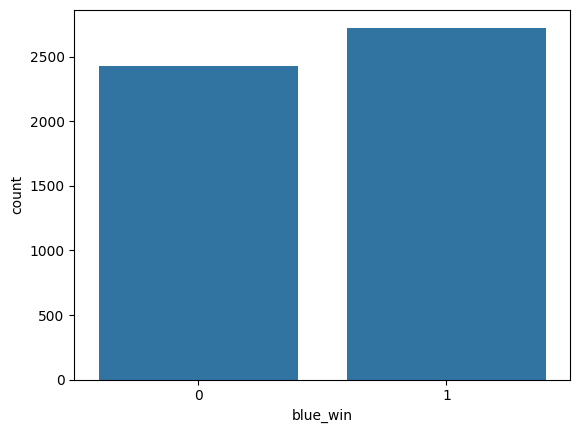

In [72]:
sns.countplot(blue_wins, x = "blue_win")

Tras este primer análisis, bastante superficial, podemos intuir que el lado rojo es de mayor ventaja que el lado azul.

### 4.2 Snowball

### 4.3 Objetivos neutrales